0.07058823529411765 0.9725490196078431
float64


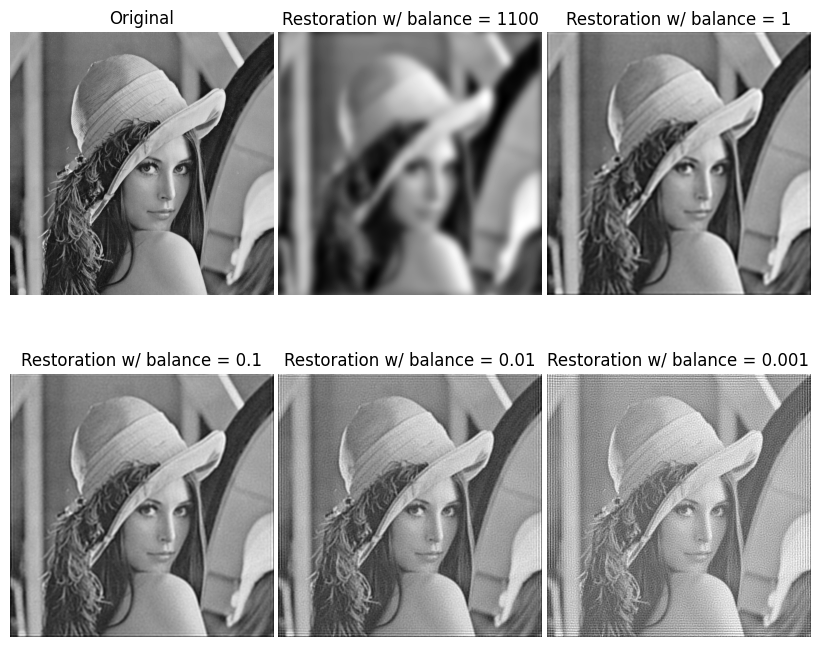

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
import cv2
from skimage import color, data, measure, restoration


#img = color.rgb2gray(data.astronaut())

img = cv2.imread('lena.jpg',0)
img = img.astype(np.float64)
img = img/255.0
print(np.min(img), np.max(img))
print(img.dtype)

psf = np.ones((5, 5)) / 25
conv = convolve2d(img, psf, 'same')
rng = np.random.default_rng()
noised = conv + 0.1 * conv.std() * rng.standard_normal(conv.shape)

# Try different balance values for image restoration using Wiener-Hunt deconvolution
balance_values = [1100, 1, 0.1, 0.01, 0.001]
restored_images = [restoration.wiener(noised, psf, balance=b) for b in balance_values]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
plt.gray()

ax[0, 0].imshow(img)
ax[0, 0].set_title('Original')
ax[0, 0].axis('off')

ax[0, 1].imshow(restored_images[0])
ax[0, 1].set_title('Restoration w/ balance = 1100')
ax[0, 1].axis('off')

ax[0, 2].imshow(restored_images[1])
ax[0, 2].set_title('Restoration w/ balance = 1')
ax[0, 2].axis('off')

ax[1, 0].imshow(restored_images[2])
ax[1, 0].set_title('Restoration w/ balance = 0.1')
ax[1, 0].axis('off')

ax[1, 1].imshow(restored_images[3])
ax[1, 1].set_title('Restoration w/ balance = 0.01')
ax[1, 1].axis('off')

ax[1, 2].imshow(restored_images[4])
ax[1, 2].set_title('Restoration w/ balance = 0.001')
ax[1, 2].axis('off')

fig.subplots_adjust(wspace=0.02, hspace=0.01,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()